# PypeCast - Simple example

### Import the essential classes

In [1]:
import pandas as pd
import numpy as np
from pypecast.models import MLP, Simple_LSTM
from pypecast.models.Het_LSTM import MDN_Het_LSTM
from pypecast.features import BuildFeaturesSupervised
from pypecast.descriptor import SeriesDescriptor

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../data/example/monthly_milk.csv')

In [3]:
series = df.Production

### Descriptor

In [4]:
sd = SeriesDescriptor()

-> Visualization of the series data:


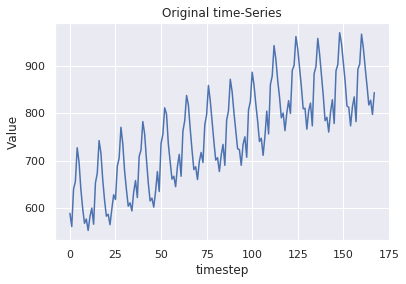

-> Description of the series data:
       Production
count  168.000000
mean   754.708333
std    102.204524
min    553.000000
25%    677.750000
50%    761.000000
75%    824.500000
max    969.000000
-------------------- Histogram --------------------


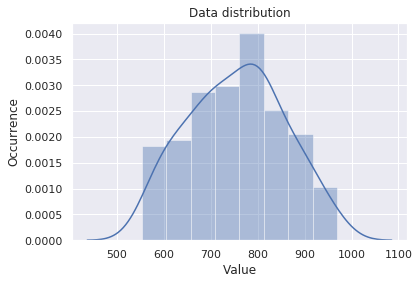

-> Autocorrelation and partial autocorrelation:


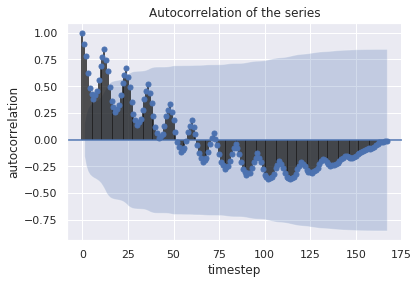

-> Checking for outliers:


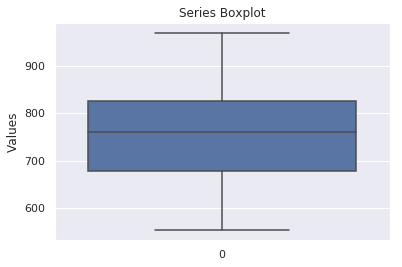

In [5]:
sd.full_report(data=series)

### Build features for supervised learning

In [6]:
n_lag = 10 #Must define the lag window (ANN input size)
n_seq = 1 #Must also define the number of future timesteps to forecast

bf = BuildFeaturesSupervised(n_lag,n_seq, difference=True,scaler_type='std')

In [7]:
scaler, train, test = bf.transform_data(series)

### Define a PypeCast Model

In [8]:
model = MDN_Het_LSTM(n_lag, n_seq)

#### Fit the model on training set

In [9]:
model.fit(train, n_batch = 100, n_epoch=100, early_stopping=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 10)        0                                            
__________________________________________________________________________________________________
LSTM_1 (LSTM)                   (None, 5)            320         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1)            6           LSTM_1[0][0]                     
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 1)            6           LSTM_1[0][0]                     
__________________________________________________________________________________________________
dense_3 (D

#### Make forecasts in the test set and evaluate them

In [10]:
forecasts = model.forecast_series(test=test, scaler=scaler, orig_series=series)

In [11]:
model.evaluate_forecast(save_report=True)

--------------------Forecast evaluation--------------------

Step t+1
stds: [0.66500974 0.8720021  0.70697814 1.001137   1.2302685  0.535512
 0.8506388  0.6298953  1.0437404  1.2949486  1.0513169  1.1460267
 0.62191087 0.8422011  0.7233039  1.0017468  1.2452444  0.5473856
 0.92569757 0.57973063 1.0369134  1.3458292  1.0706657  1.2217604
 0.64132524 0.870629   0.69757956 0.9761807  1.2824742  0.5504852
 0.8918361  0.60495675 1.0240525  1.2954471  1.0439135  1.1896132
 0.59978676 0.86865425]
thres: [1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1
 0]
t+1 RMSE: 43.959270
t+1 MAE: 35.754675
t+1 MAPE: 4.207521
t+1 sMAPE: 0.042061
t+1 MAEk: 17.127509
------------------------------------------------------------

--------------------Naive forecast evaluation--------------------
Step t+1
t+1 RMSE: 75.221602
t+1 MAE: 52.026316
t+1 MAPE: 6.144490
t+1 sMAPE: 0.062261
------------------------------------------------------------

--------------------Evaluation for each fore

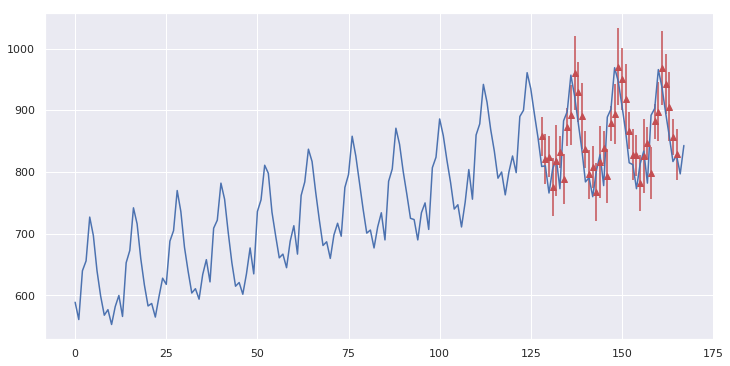

In [12]:
model.plot_forecasts(forecasts=forecasts,series=series, test=test)